In [81]:
#DATA PREPROCESSING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


df  = pd.read_csv("C:/Users/nurin/Downloads/Telegram Desktop/Absenteeism_at_work_dataset2025.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,#,7.0,3,1,289.0,36,13.0,33,"239,554",...,0.0,#,2,1.0,#,1.0,90.0,172,30,4
1,2,0,NaN,#,1,118.0,13,18.0,#,"239,554",...,1.0,#,1,1.0,0,0.0,98.0,NaN,31,0
2,3,NaN,NaN,4,1,179.0,#,18.0,38,NaN,...,NaN,1,0,1.0,0,NaN,89.0,170,31,2
3,4,7,7.0,5,1,279.0,5,14.0,39,NaN,...,0.0,1,2,NaN,1,0.0,68.0,168,#,4
4,5,23,7.0,5,1,289.0,36,NaN,33,"239,554",...,0.0,1,#,1.0,0,1.0,90.0,NaN,30,2


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8854 entries, 0 to 8853
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               8854 non-null   int64  
 1   Reason for absence               8770 non-null   object 
 2   Month of absence                 8804 non-null   float64
 3   Day of the week                  8838 non-null   object 
 4   Seasons                          8854 non-null   int64  
 5   Transportation expense           8836 non-null   float64
 6   Distance from Residence to Work  8854 non-null   object 
 7   Service time                     8838 non-null   float64
 8   Age                              8854 non-null   object 
 9   Work load                        8765 non-null   object 
 10  Hit target                       8854 non-null   int64  
 11  Disciplinary failure             8838 non-null   float64
 12  Education           

In [83]:
df.isna().sum()

ID                                  0
Reason for absence                 84
Month of absence                   50
Day of the week                    16
Seasons                             0
Transportation expense             18
Distance from Residence to Work     0
Service time                       16
Age                                 0
Work load                          89
Hit target                          0
Disciplinary failure               16
Education                          18
Son                                 0
Social drinker                     50
Social smoker                       0
Pet                                32
Weight                             27
Height                             59
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [84]:
#QUESTION 1
#Count missing values (NaN) in each column
missing_values = df.isna().sum()

#Count noisy '#' values in each column
hash_values = (df == '#').sum()

#Combine both into a summary
missing_summary = pd.DataFrame({
    "Missing (NaN)": missing_values,
    "Data Noise (#)": hash_values,
    "Total Issues": missing_values + hash_values
})


In [85]:
print(missing_summary)

                                 Missing (NaN)  Data Noise (#)  Total Issues
ID                                           0               0             0
Reason for absence                          84              17           101
Month of absence                            50               0            50
Day of the week                             16               1            17
Seasons                                      0               0             0
Transportation expense                      18               0            18
Distance from Residence to Work              0             380           380
Service time                                16               0            16
Age                                          0               1             1
Work load                                   89             135           224
Hit target                                   0               0             0
Disciplinary failure                        16               0            16

In [86]:
# Replace all '#' with NaN
df.replace('#', pd.NA, inplace=True)

In [87]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,<NA>,7.0,3,1,289.0,36,13.0,33,"239,554",...,0.0,<NA>,2,1.0,<NA>,1.0,90.0,172,30,4
1,2,0,NaN,<NA>,1,118.0,13,18.0,<NA>,"239,554",...,1.0,<NA>,1,1.0,0,0.0,98.0,NaN,31,0
2,3,NaN,NaN,4,1,179.0,<NA>,18.0,38,NaN,...,NaN,1,0,1.0,0,NaN,89.0,170,31,2
3,4,7,7.0,5,1,279.0,5,14.0,39,NaN,...,0.0,1,2,NaN,1,0.0,68.0,168,<NA>,4
4,5,23,7.0,5,1,289.0,36,NaN,33,"239,554",...,0.0,1,<NA>,1.0,0,1.0,90.0,NaN,30,2


In [88]:
# Fill missing values with the mode for each column 
for col in df.columns:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])

In [89]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load                          0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8854 entries, 0 to 8853
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               8854 non-null   int64  
 1   Reason for absence               8854 non-null   object 
 2   Month of absence                 8854 non-null   float64
 3   Day of the week                  8854 non-null   object 
 4   Seasons                          8854 non-null   int64  
 5   Transportation expense           8854 non-null   float64
 6   Distance from Residence to Work  8854 non-null   object 
 7   Service time                     8854 non-null   float64
 8   Age                              8854 non-null   object 
 9   Work load                        8854 non-null   object 
 10  Hit target                       8854 non-null   int64  
 11  Disciplinary failure             8854 non-null   float64
 12  Education           

In [91]:
df.to_csv("cleaned_dataset.csv", index=False)

In [92]:
import pandas as pd
dfCSV = pd.read_csv("cleaned_dataset.csv")

In [93]:
dfCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8854 entries, 0 to 8853
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               8854 non-null   int64  
 1   Reason for absence               8854 non-null   int64  
 2   Month of absence                 8854 non-null   float64
 3   Day of the week                  8854 non-null   int64  
 4   Seasons                          8854 non-null   int64  
 5   Transportation expense           8854 non-null   float64
 6   Distance from Residence to Work  8854 non-null   int64  
 7   Service time                     8854 non-null   float64
 8   Age                              8854 non-null   int64  
 9   Work load                        8854 non-null   object 
 10  Hit target                       8854 non-null   int64  
 11  Disciplinary failure             8854 non-null   float64
 12  Education           

In [94]:
dfCSV['Absenteeism time in hours'] = pd.to_numeric(dfCSV['Absenteeism time in hours'], errors='coerce')

In [95]:
# Create a new column for the simplified labels
def categorize_hours(hours):
    if hours <= 4:
        return 1  # Time Slip
    elif hours <= 72:
        return 2  # MC
    else:
        return 3  # Abnormal

In [96]:
dfCSV['Absenteeism Category'] = dfCSV['Absenteeism time in hours'].apply(categorize_hours)

In [97]:
# Check the result
print(dfCSV[['Absenteeism time in hours', 'Absenteeism Category']].head())

   Absenteeism time in hours  Absenteeism Category
0                          4                     1
1                          0                     1
2                          2                     1
3                          4                     1
4                          2                     1


In [98]:
#question 2
# Clean and convert 'Work load' to numeric by removing commas
dfCSV['Work load'] = dfCSV['Work load'].str.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [99]:
# Convert all other relevant columns to numeric, coercing errors to NaN
for col in dfCSV.columns:
    dfCSV[col] = pd.to_numeric(dfCSV[col], errors='coerce')

In [100]:
# Impute all missing values using the mode for each column
imputer = SimpleImputer(strategy='most_frequent')
df_cleaned = pd.DataFrame(imputer.fit_transform(dfCSV), columns=dfCSV.columns)

In [101]:
# --- Question 2: Calculate Average Values ---
# Calculate the average values for 'Hit target' and 'Work load'
avg_hit_target = df_cleaned['Hit target'].mean()
avg_workload = df_cleaned['Work load'].mean()

In [102]:
print("Question 2: Average values for 'Hit target' and 'Workload':")
print(f"Average 'Hit target': {avg_hit_target:.2f}")
print(f"Average 'Workload': {avg_workload:.2f}")

Question 2: Average values for 'Hit target' and 'Workload':
Average 'Hit target': 94.76
Average 'Workload': 271265.64


In [103]:
dfCSV.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism Category
0,1,19,7.0,3,1,289.0,36,13.0,33,239554,...,1,2,1.0,0,1.0,90.0,172,30,4,1
1,2,0,6.0,5,1,118.0,13,18.0,28,239554,...,1,1,1.0,0,0.0,98.0,178,31,0,1
2,3,19,6.0,4,1,179.0,26,18.0,38,275089,...,1,0,1.0,0,0.0,89.0,170,31,2,1
3,4,7,7.0,5,1,279.0,5,14.0,39,275089,...,1,2,1.0,1,0.0,68.0,168,31,4,1
4,5,23,7.0,5,1,289.0,36,18.0,33,239554,...,1,1,1.0,0,1.0,90.0,178,30,2,1


In [104]:
# --- Question 3: Absenteeism Category Counts and Visualization ---
# Define a function to categorize 'Absenteeism time in hours'
def categorize_time(hours):
    if hours <= 4:
        return 'Time Slip'
    elif 4 < hours <= 72:
        return 'MC'
    else:
        return 'Abnormal'


In [105]:
# Apply the categorization function to create a new column
df_cleaned['Absenteeism category'] = df_cleaned['Absenteeism time in hours'].apply(categorize_time)

In [106]:
# Count the number of employees in each absenteeism category
category_counts = df_cleaned['Absenteeism category'].value_counts()
print("Question 3: Number of employees in each absenteeism category:")
print(category_counts)
print("\n" + "="*50 + "\n")

Question 3: Number of employees in each absenteeism category:
Absenteeism category
Time Slip    5531
MC           3242
Abnormal       81
Name: count, dtype: int64




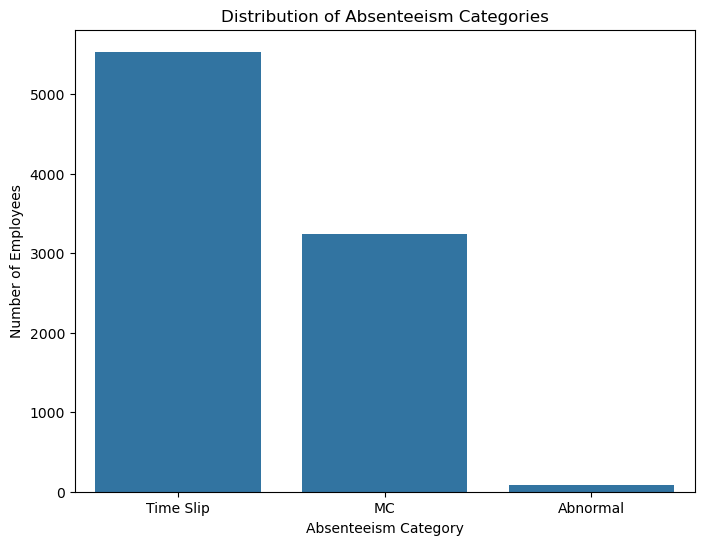

In [107]:
# Visualize the information using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Absenteeism Categories')
plt.xlabel('Absenteeism Category')
plt.ylabel('Number of Employees')
plt.show()

In [108]:
# Question 4: Identify Abnormal Records and Create CSV 
abnormal_records = df_cleaned[df_cleaned['Absenteeism category'] == 'Abnormal']

# create file
abnormal_records.to_csv('Abnormal_Absenteeism_Records.csv', index=False, header=True)
print("Question 4: Employee records with 'Abnormal' status have been saved to 'Abnormal_Absenteeism_Records.csv'.")


Question 4: Employee records with 'Abnormal' status have been saved to 'Abnormal_Absenteeism_Records.csv'.


In [109]:
# --- Question 5: Identify Specific Employee Group and Visualize ---
# Identify employees aged 35 and below
age_filter = df_cleaned['Age'] <= 35

# Identify employees living 50KM or more from work
distance_filter = df_cleaned['Distance from Residence to Work'] >= 50

# Identify employees who have taken 'MC'
mc_filter = df_cleaned['Absenteeism category'] == 'MC'

# Combine filters to get the count of the specific group
specific_group_count = df_cleaned[age_filter & distance_filter & mc_filter].shape[0]

# Calculate the total population
total_population = df_cleaned.shape[0]

# Calculate the count of the rest of the population
other_population_count = total_population - specific_group_count

# Prepare data for the pie chart
proportions = [specific_group_count, other_population_count]
labels = ['Specific Group (Age ≤ 35, Distance ≥ 50KM, MC)', 'Other Population']

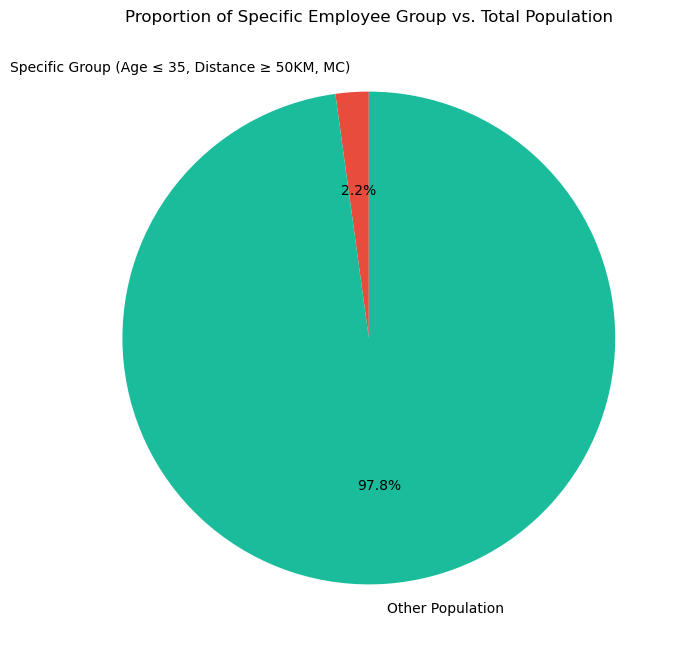

Question 5: Analysis Complete.
Number of employees aged 35 and below, living >= 50KM from work, and taking MC: 192
Total number of employees: 8854


In [110]:
# Visualize the proportion using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#E74C3C','#1ABC9C'])
plt.title('Proportion of Specific Employee Group vs. Total Population')
plt.show()

print("Question 5: Analysis Complete.")
print(f"Number of employees aged 35 and below, living >= 50KM from work, and taking MC: {specific_group_count}")
print(f"Total number of employees: {total_population}")

In [111]:
# --- Question 6: Analyze Age and Son Relationship ---
# Calculate the correlation coefficient between 'Age' and 'Son'
correlation = df_cleaned['Age'].corr(df_cleaned['Son'])

# Describe the relationship
print("Question 6: Relationship between 'Age' and 'Son':")
print(f"Correlation coefficient: {correlation:.2f}")

# Describe the strength and type of relationship
if correlation > 0.3:
    relationship_type = "a positive"
    strength = "strong"
elif 0.1 < correlation <= 0.3:
    relationship_type = "a positive"
    strength = "weak"
elif correlation < -0.3:
    relationship_type = "a negative"
    strength = "strong"
elif -0.3 <= correlation < -0.1:
    relationship_type = "a negative"
    strength = "weak"
else:
    relationship_type = "no"
    strength = ""

print(f"Based on the correlation coefficient, there is {strength} {relationship_type} relationship between Age and the number of Sons.")


Question 6: Relationship between 'Age' and 'Son':
Correlation coefficient: 0.03
Based on the correlation coefficient, there is  no relationship between Age and the number of Sons.


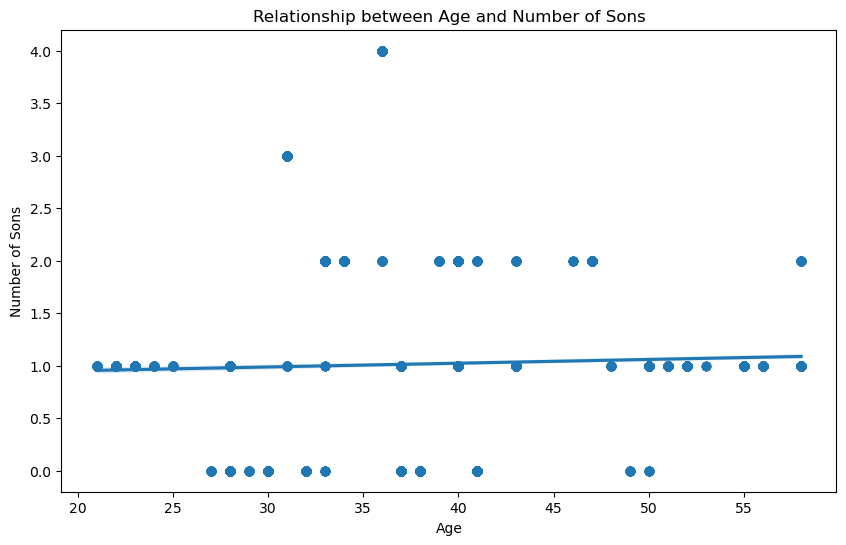

In [112]:
# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Son', data=df_cleaned, scatter_kws={'alpha':0.5})
plt.title('Relationship between Age and Number of Sons')
plt.xlabel('Age')
plt.ylabel('Number of Sons')
plt.show()

In [113]:
# --- Question 7: Analyze BMI and Age Relationship ---
# Calculate the correlation coefficient between 'Body mass index' and 'Age'
correlation_bmi_age = df_cleaned['Body mass index'].corr(df_cleaned['Age'])

# Describe the relationship
print("Question 7: Relationship between 'Body mass index' and 'Age':")
print(f"Correlation coefficient: {correlation_bmi_age:.2f}")

# Define the strength and type of relationship based on the correlation value
if correlation_bmi_age > 0.3:
    relationship_type = "a positive"
    strength = "strong"
elif 0.1 < correlation_bmi_age <= 0.3:
    relationship_type = "a positive"
    strength = "weak"
elif correlation_bmi_age < -0.3:
    relationship_type = "a negative"
    strength = "strong"
elif -0.3 <= correlation_bmi_age < -0.1:
    relationship_type = "a negative"
    strength = "weak"
else:
    relationship_type = "no"
    strength = ""

print(f"Based on the correlation coefficient, there is {strength} {relationship_type} relationship between Body Mass Index and Age.")


Question 7: Relationship between 'Body mass index' and 'Age':
Correlation coefficient: 0.62
Based on the correlation coefficient, there is strong a positive relationship between Body Mass Index and Age.


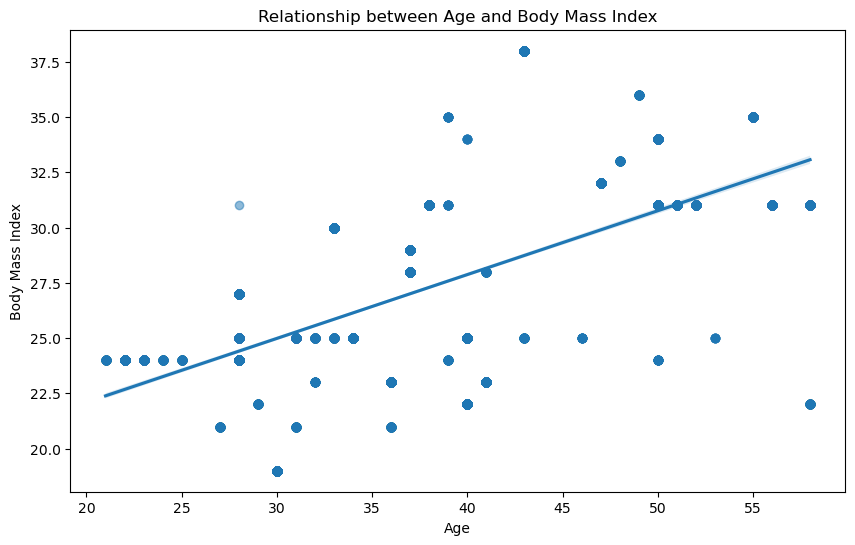

In [114]:
# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Body mass index', data=df_cleaned, scatter_kws={'alpha':0.5})
plt.title('Relationship between Age and Body Mass Index')
plt.xlabel('Age')
plt.ylabel('Body Mass Index')
plt.show()

In [115]:
# --- Question 8: Analyze Transportation Expense ---
# Calculate the range for 'Transportation expense'
transportation_expense_range = df_cleaned['Transportation expense'].max() - df_cleaned['Transportation expense'].min()

# Calculate the mean of 'Transportation expense'
transportation_expense_mean = df_cleaned['Transportation expense'].mean()

print("Question 8: Average range for 'Transportation expense':")
print(f"The range for 'Transportation expense' is: {transportation_expense_range:.2f}")


Question 8: Average range for 'Transportation expense':
The range for 'Transportation expense' is: 270.00


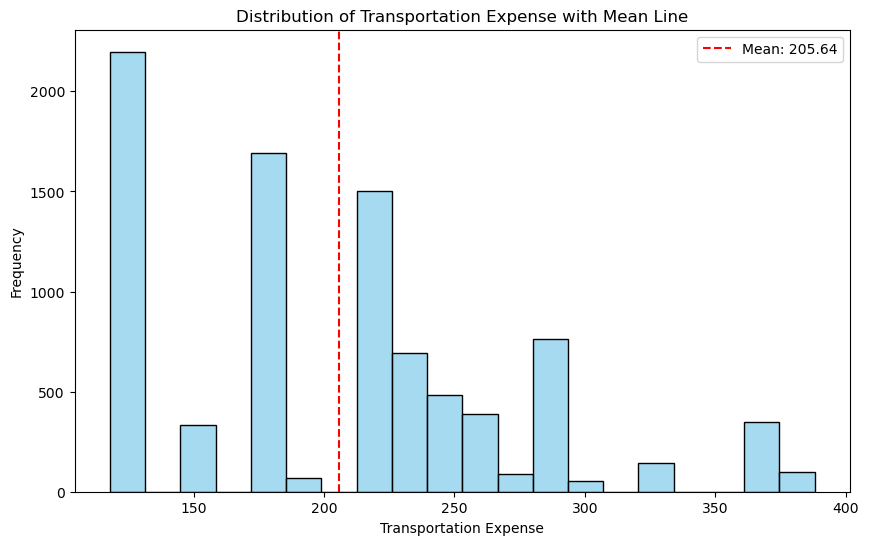

In [116]:
# Represent the data using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Transportation expense'], kde=False, bins=20, color='skyblue')
plt.axvline(transportation_expense_mean, color='red', linestyle='--', label=f'Mean: {transportation_expense_mean:.2f}')
plt.title('Distribution of Transportation Expense with Mean Line')
plt.xlabel('Transportation Expense')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Question 9: Model Performance Metrics (Random Forest)
Training Accuracy: 1.0000
Test Accuracy: 0.9859

Classification Report (Test Set):
              precision    recall  f1-score   support

    Abnormal       0.92      0.80      0.86        15
          MC       0.98      0.98      0.98       628
   Time Slip       0.99      0.99      0.99      1128

    accuracy                           0.99      1771
   macro avg       0.96      0.92      0.94      1771
weighted avg       0.99      0.99      0.99      1771



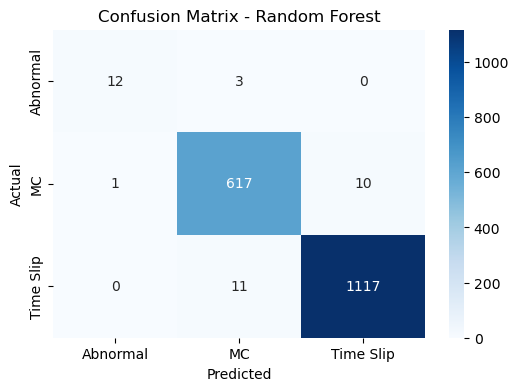

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# --- Data Cleaning and Preprocessing ---
df.replace(['#', ''], np.nan, inplace=True)
df['Work load'] = df['Work load'].astype(str).str.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

imputer = SimpleImputer(strategy='most_frequent')
df_cleaned = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# --- Label Simplification ---
def categorize_time(hours):
    if hours <= 4:
        return 'Time Slip'
    elif 4 < hours <= 72:
        return 'MC'
    else:
        return 'Abnormal'

df_cleaned['Absenteeism category'] = df_cleaned['Absenteeism time in hours'].apply(categorize_time)

# --- Modelling / AI Application (Part II) ---
# Prepare the features (X) and the target variable (y)
X = df_cleaned.drop(columns=['Absenteeism time in hours', 'Absenteeism category'])
y = df_cleaned['Absenteeism category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Train Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Comparison Metrics ---
print("Question 9: Model Performance Metrics (Random Forest)")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}\n")

# Detailed classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

# --- Data Cleaning and Preprocessing ---
# Replace '#' and empty cells with NaN
df.replace(['#', ''], np.nan, inplace=True)

# Clean and convert 'Work load' to numeric by removing commas
df['Work load'] = df['Work load'].astype(str).str.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Convert all other relevant columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute all missing values using the mode for each column
imputer = SimpleImputer(strategy='most_frequent')
df_cleaned = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# --- Label Simplification ---
def categorize_time(hours):
    if hours <= 4:
        return 'Time Slip'
    elif 4 < hours <= 72:
        return 'MC'
    else:
        return 'Abnormal'

df_cleaned['Absenteeism category'] = df_cleaned['Absenteeism time in hours'].apply(categorize_time)

# --- Modelling / AI Application (Part II) ---
# Prepare the features (X) and the target variable (y)
X = df_cleaned.drop(columns=['ID', 'Absenteeism time in hours', 'Absenteeism category'])
y = df_cleaned['Absenteeism category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Train a classification model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# --- Question 10: Predict for New Data ---
# Define the new data points from the problem description
newData = [
    [11, 8, 2, 1, 180, 51, 18, 42, 205917, 92, 0, 1, 0, 1, 0, 0, 89, 170, 31],
    [22, 7, 6, 1, 361, 52, 3, 28, 239554, 97, 0, 1, 1, 1, 0, 4, 80, 172, 27],
    [15, 12, 3, 2, 160, 12, 14, 34, 280549, 98, 0, 1, 2, 1, 0, 0, 95, 196, 25]
]

# Create a DataFrame for the new data with the correct column names
# We use X.columns to ensure the column names match the trained model's features
new_data_df = pd.DataFrame(newData, columns=X.columns)

# Print the number of columns to verify the match
print(f"Number of columns in X used for training: {len(X.columns)}")
print(f"Number of values in newData: {len(newData[0])}")
print(f"Number of columns in new_data_df for prediction: {len(new_data_df.columns)}")

# Use the trained model to predict the absenteeism category for each new data point
predictions = model.predict(new_data_df)

print("\nQuestion 10: Prediction Results for New Data")
print(f"Prediction for newData a: {predictions[0]}")
print(f"Prediction for newData b: {predictions[1]}")
print(f"Prediction for newData c: {predictions[2]}")

Number of columns in X used for training: 19
Number of values in newData: 19
Number of columns in new_data_df for prediction: 19

Question 10: Prediction Results for New Data
Prediction for newData a: Time Slip
Prediction for newData b: MC
Prediction for newData c: Abnormal
